In [1]:
%load_ext autoreload
%autoreload 2

import activations

Activations = activations.Activations

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations

from gtda.diagrams import PairwiseDistance

In [3]:
basepath = '../Tesi/trained_models/'
file = '10kbatches/steps_20_batch_200_RNN_512_relu_rf_012_DoG_True_plane_lr_00001_weight_decay_00001/activations.npy'
path = basepath + file

In [4]:
ratemaps = np.load(path)

In [5]:
activations = Activations(ratemaps)

In [6]:
sacs = activations.calculate_sacs()

In [7]:
dgms = activations.calculate_dgms(digits=2)

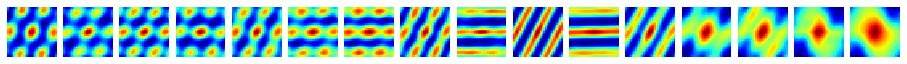

In [8]:
idxs = [62,239,72,32,0,14,511,9,16,20,36,137,341,8,5,2]
dgmsample = dgms[idxs]
activations.vizall(sacs[idxs])

In [10]:
import distances

In [15]:
from gtda.diagrams.representations import identity
from gtda.diagrams import PersistenceImage

In [16]:
perima = PersistenceImage()

In [17]:
dgmsamplepi = perima.fit_transform(dgmsample)

In [19]:
dgmsamplepi.shape

(16, 2, 100, 100)

In [25]:
pih0 = dgmsamplepi[:,0,...]
pih1 = dgmsamplepi[:,1,...]

In [42]:
pih0[0].shape

(100, 100)

In [44]:
D0 = np.zeros((16,16))
D1 = np.zeros((16,16))
for i,j in combinations(range(16),2):
    D0[i,j] = np.linalg.norm(np.stack((pih0[i],pih0[j])))
    D1[i,j] = np.linalg.norm(np.stack((pih1[i],pih1[j])))

In [48]:
D = np.stack((D0,D1),axis=2)
D.shape

(16, 16, 2)

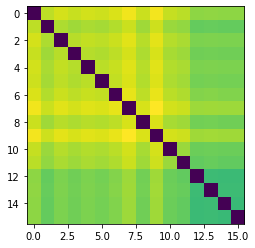

In [51]:
plt.imshow(D[:,:,0]+D[:,:,0].T)

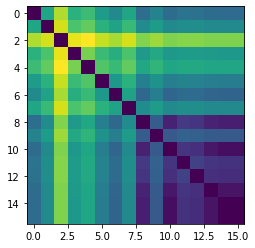

In [53]:
plt.imshow(D[:,:,1]+D[:,:,1].T)

In [63]:
D0 = D[:,:,0]+D[:,:,0].T
D1 = D[:,:,1]+D[:,:,1].T

In [68]:
D = np.stack((D0,D1),axis=2)

In [69]:
Dn = np.linalg.norm(Dn, axis=2)

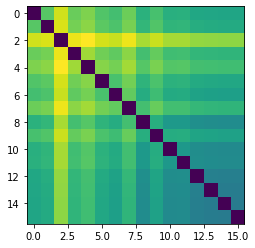

In [72]:
plt.imshow(Dn)

In [74]:
D0.min(),D0.max()

(0.0, 0.8165928931903469)

In [75]:
D1.min(),D1.max()

(0.0, 1.105728300615097)

In [76]:
scale = (D0.max()-D0.min())/(D1.max()-D1.min())

In [78]:
D1scaled = D1*scale

In [79]:
Dscaled = np.stack((D0,D1scaled),axis=2)
Dscaled.shape

(16, 16, 2)

In [80]:
Dscaledn = np.linalg.norm(Dscaled,axis=2)

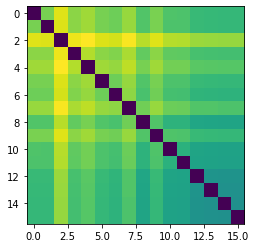

In [82]:
plt.imshow(Dscaledn)